In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
hotel=pd.read_csv("hotel_booking.csv")

In [10]:
hotel.shape

(119390, 32)

In [11]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [12]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [14]:
filter1 = (hotel['children']==0) & (hotel['adults']==0) & (hotel['babies']==0)

## Adults,babies & children cant be zero at a same time bcz booking couldn't be possible if these 3 attributes are 0 ..

In [15]:
filter1

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [16]:
hotel[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,NaN,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,NaN,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,NaN,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,NaN,NaN,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,NaN,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,NaN,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [17]:
hotel[filter1].shape

(180, 32)

In [18]:
hotel[~filter1].shape

(119210, 32)

In [20]:
hotel2 = hotel[~filter1]

In [21]:
len(hotel2[(hotel2['children']==1) & (hotel2['adults']==0) & (hotel2['babies']==0)])

4

### Removing Duplicated data

In [22]:
hotel2.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119210, dtype: bool

In [23]:
type(hotel2.duplicated())

pandas.core.series.Series

In [24]:
hotel2.duplicated().sum()

np.int64(31980)

In [25]:
hotel2.drop_duplicates(inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5284\2750360326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel2.drop_duplicates(inplace=True)


In [26]:
hotel2.shape

(87230, 32)

### ## 3.. Performing descriptive analysis !

In [27]:
hotel2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [32]:
hotel2[['lead_time' , 'total_of_special_requests' , 'adr']].describe().T

## getting (mean, median , std , percentile) of above features

,count,mean,std,min,25%,50%,75%,max
lead_time,87230.0,79.971019,86.058683,0.00,11.00,49.0,125.0,737.0
total_of_special_requests,87230.0,0.698934,0.832051,0.00,0.00,0.0,1.0,5.0
adr,87230.0,106.518031,54.891227,-6.38,72.25,98.2,134.1,5400.0


In [33]:
hotel2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87226 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                            8723

In [ ]:
'''

12 features belong to object data-type , ie.. in context to Python ,
they belong to string data-type

16 features belong to int64 nature 

4 features belong to float64 nature  ,


The memory usage of a DataFrame (including the index) is shown when calling the info(). 

 
 
The + symbol indicates that the true memory usage could be higher,  
because pandas does not count the memory used by values in columns 
with dtype=object


Passing memory_usage='deep' will enable a more accurate 
memory usage report ..


'''

In [34]:
hotel2.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87226 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                            8723

In [ ]:
'''
print quantile values ..

'''

In [35]:
for col in ['lead_time' , 'total_of_special_requests' , 'adr']:
    print('feature name : {}'.format(col))
    
    for i in range(90,101,1):
        quantile_value = np.quantile(hotel2[col] , q=i/100)
        print('{}th quantile value is {}'.format(i , quantile_value))
    print('\n')

feature name : lead_time
90th quantile value is 204.0
91th quantile value is 212.0
92th quantile value is 220.0
93th quantile value is 230.0
94th quantile value is 241.0
95th quantile value is 256.0
96th quantile value is 272.0
97th quantile value is 291.0
98th quantile value is 315.0
99th quantile value is 347.0
100th quantile value is 737.0


feature name : total_of_special_requests
90th quantile value is 2.0
91th quantile value is 2.0
92th quantile value is 2.0
93th quantile value is 2.0
94th quantile value is 2.0
95th quantile value is 2.0
96th quantile value is 2.0
97th quantile value is 3.0
98th quantile value is 3.0
99th quantile value is 3.0
100th quantile value is 5.0


feature name : adr
90th quantile value is 174.0
91th quantile value is 179.0
92th quantile value is 185.0
93th quantile value is 190.0
94th quantile value is 197.1
95th quantile value is 204.13300000000018
96th quantile value is 213.0
97th quantile value is 225.0
98th quantile value is 239.0
99th quantile value

In [36]:
np.quantile(hotel2['lead_time'] , q=0.9)

np.float64(204.0)

In [ ]:
'''

"adr" feature seems to have Outlier as 99th percentile value 
is 261 but 100th percentile(max value) is 5400 .. 


'''

In [37]:
not_cancelled = hotel2[hotel2['is_canceled']==0]

In [38]:
not_cancelled.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015


In [46]:
country_wise_data = not_cancelled['country'].value_counts().reset_index()

In [52]:
country_wise_data.columns = ['country' , 'count']



In [47]:
country_wise_data

,country,count
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
160,KIR,1
161,ATF,1
162,TJK,1
163,SLE,1


In [48]:
### establishing the entire set-up of Plotly..

import chart_studio.plotly as py
## chart_studio provides a web-service for hosting graphs!

import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot

## iplot() when working in a Jupyter Notebook to
## display the plot in the Ipython notebook.

init_notebook_mode(connected=True)

In [53]:
# show on map

map_guest = px.choropleth(data_frame = country_wise_data , 
              locations= country_wise_data['country'] , 
              color=country_wise_data['count'] , 
              hover_name=country_wise_data['country'] , 
              title= "Home country of Guests"
          
             )

In [54]:
map_guest.show()

### Most guests are from Portugal and other countries in Europe

### 5 Is any difference between assigned and reserved room types or not ?

In [55]:
hotel2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [57]:
hotel_choice = pd.crosstab(index = hotel2['reserved_room_type'] , columns=hotel2['assigned_room_type'] , margins=True  )

In [ ]:
'''

## lets find meaningful insight from this :

for A category room , 56436 folks have reserved "A" & 45850 folks get assigned_room as "A".. & rest are unable to get !

for B category room , 996 folks have reserved "B" &  872 folks get assigned_room as "B".. & rest are unable to get !


'''

### Lets normalize above stuff to get more meaningful insights!

In [59]:
## we will say just normalize over row , hence we need to pass normalize = 'index'

hotel_choice_normalize = pd.crosstab(index = hotel2['reserved_room_type'] , columns=hotel2['assigned_room_type'] , margins=True ,normalize='index' ).round(2)*100

In [60]:
hotel_choice_normalize

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L
reserved_room_type,,,,,,,,,,,
A,81.0,2.0,2.0,11.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
B,11.0,88.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C,1.0,0.0,95.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
D,2.0,0.0,0.0,92.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,90.0,6.0,2.0,0.0,1.0,0.0,0.0
F,0.0,0.0,0.0,0.0,1.0,93.0,4.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,1.0,98.0,0.0,1.0,0.0,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,2.0,97.0,1.0,0.0,0.0
L,17.0,17.0,17.0,0.0,0.0,17.0,0.0,17.0,0.0,0.0,17.0


In [ ]:
'''

Q.. Is any difference between assigned and reserved room type ?
Ans : Yes 


'''

### 6.. Bookings by market segment1

In [61]:
hotel2['market_segment'].value_counts()

market_segment
Online TA        51553
Offline TA/TO    13855
Direct           11780
Groups            4922
Corporate         4200
Complementary      692
Aviation           226
Undefined            2
Name: count, dtype: int64

In [62]:
hotel2['market_segment'].value_counts().values

array([51553, 13855, 11780,  4922,  4200,   692,   226,     2])

In [63]:
hotel2['market_segment'].value_counts().index

Index(['Online TA', 'Offline TA/TO', 'Direct', 'Groups', 'Corporate',
       'Complementary', 'Aviation', 'Undefined'],
      dtype='object', name='market_segment')

In [69]:
# pie plot

market_counts = hotel2['market_segment'].value_counts()

# Create pie chart
fig = px.pie(hotel2['market_segment'].value_counts().index,
             values=market_counts.values,
             names=market_counts.index,
             title="Distribution of Market Segments")
fig.show()

In [ ]:
'''
Most of the bookings have been done in Online mode 

'''

### 6b) Analysing Avg.price per night (ADR) of various room-types for all the market segment ..

In [70]:
hotel2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5284\3286606752.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




<Axes: xlabel='market_segment', ylabel='adr'>

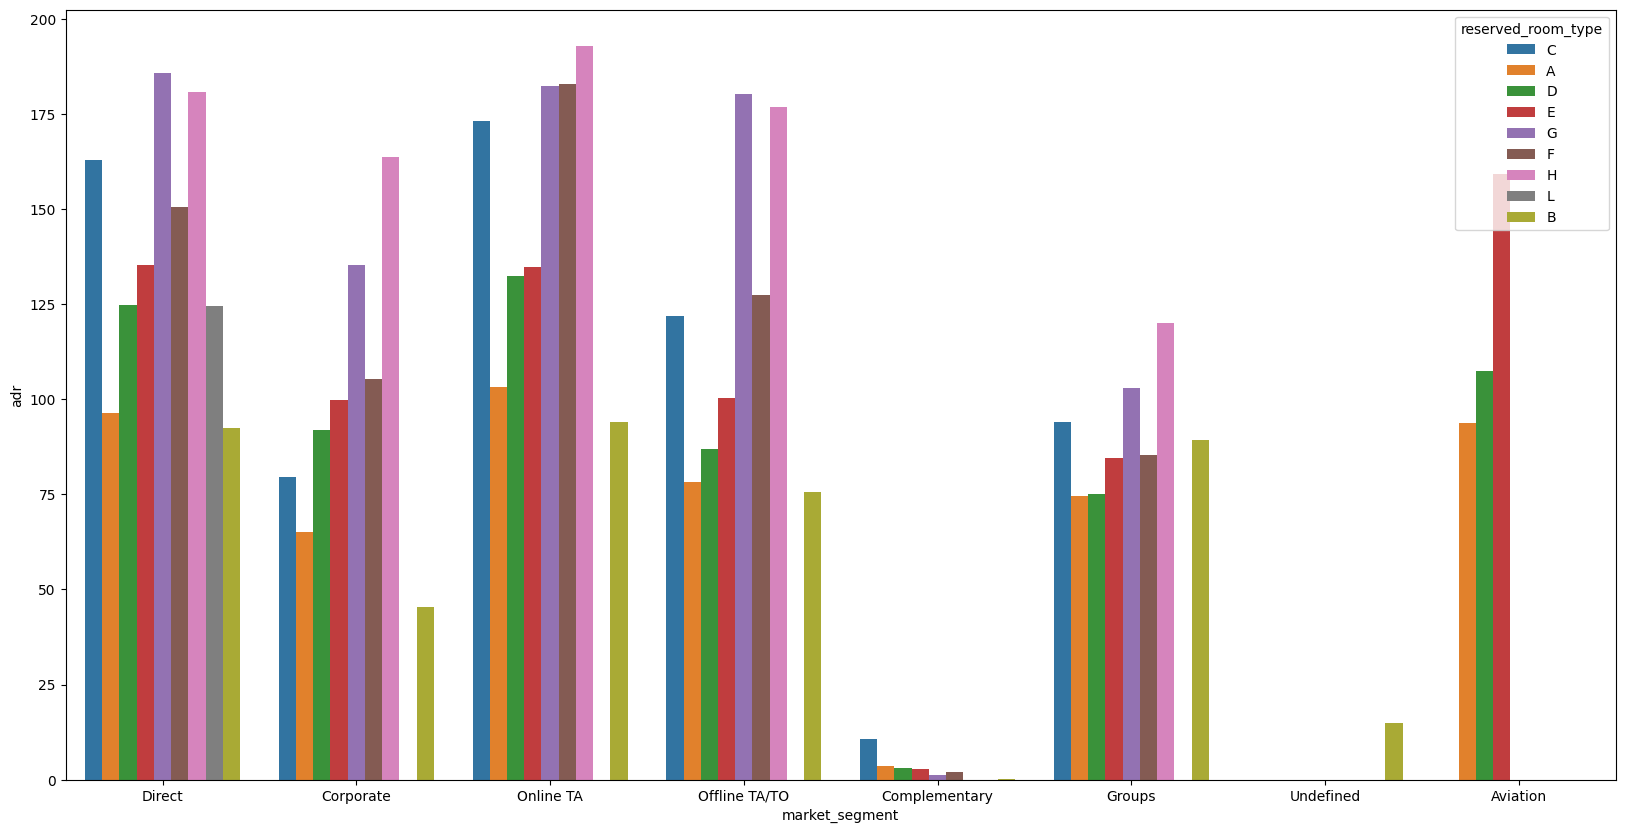

In [72]:
plt.figure(figsize=(20,10))
sns.barplot(x="market_segment" , y="adr" , hue="reserved_room_type" , data=hotel2 , ci=None)

### ie this plot tells avg adr of various room-types for all the market segment ..


### 7 Total guests arrival on each day :

In [73]:
hotel2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [74]:
hotel2['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [75]:
dict_month = {'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12,
       'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6}

In [76]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [77]:
hotel2['arrival_date_month_index'] = hotel2['arrival_date_month'].map(dict_month)

In [78]:
hotel2[['arrival_date_year',
       'arrival_date_month_index' , 'arrival_date_day_of_month']]

,arrival_date_year,arrival_date_month_index,arrival_date_day_of_month
0,2015,7,1
1,2015,7,1
2,2015,7,1
3,2015,7,1
4,2015,7,1
...,...,...,...
119385,2017,8,30
119386,2017,8,31
119387,2017,8,31
119388,2017,8,31


In [80]:
hotel2['arrival_date'] = hotel2['arrival_date_year'].astype(str) + '-' + hotel2['arrival_date_month_index'].astype(str) + '-' + hotel2['arrival_date_day_of_month'].astype(str)


'''
we need to use .astype(str) to convert int values to string , 
otherwise we are unable to perform this string concatenation operation ..
'''

'\nwe need to use .astype(str) to convert int values to string , \notherwise we are unable to perform this string concatenation operation ..\n'

In [81]:
hotel2.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_index,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015,7,2015-7-1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015,7,2015-7-1


In [82]:
hotel2[['adults', 'children', 'babies']]

,adults,children,babies
0,2,0.0,0
1,2,0.0,0
2,1,0.0,0
3,1,0.0,0
4,2,0.0,0
...,...,...,...
119385,2,0.0,0
119386,3,0.0,0
119387,2,0.0,0
119388,2,0.0,0


In [83]:
hotel2['Total_guests'] = hotel2['adults'] + hotel2['children'] + hotel2['babies']

In [85]:
booking_not_Cancel = hotel2[hotel2['is_canceled']==0]

In [86]:
guest_arrival_series = booking_not_Cancel.groupby(['arrival_date'])['Total_guests'].sum()

<Axes: xlabel='arrival_date'>

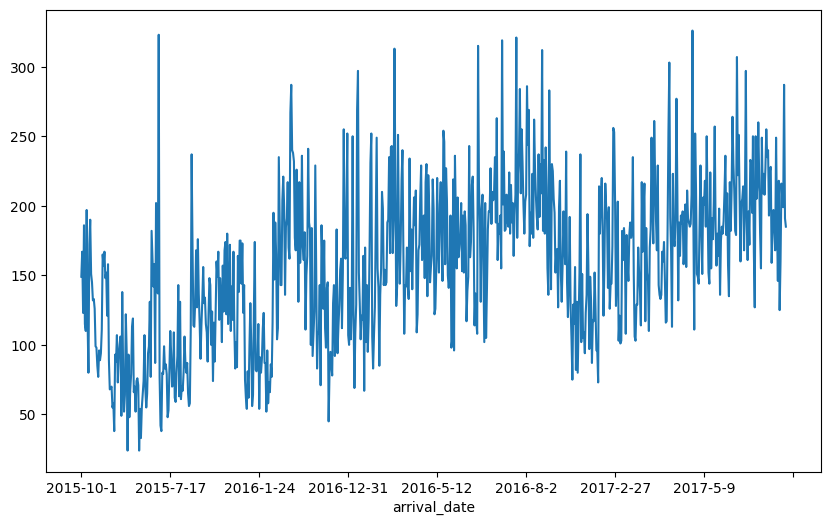

In [87]:
guest_arrival_series.plot(figsize=(10,6))

In [ ]:
'''
Q.. Is there any pattern ?
Ans .. No , there is no visible pattern in guests arrival 
in this line-plot as we have some un-even trend ..

'''

### 8.. Analysing distribution of "guests arrival"¶

In [88]:
guest_arrival_series

arrival_date
2015-10-1     149.0
2015-10-10    167.0
2015-10-11    123.0
2015-10-12    186.0
2015-10-13    115.0
              ...  
2017-8-5      205.0
2017-8-6      199.0
2017-8-7      287.0
2017-8-8      191.0
2017-8-9      185.0
Name: Total_guests, Length: 793, dtype: float64

In [89]:
type(guest_arrival_series)

### this is a series having indexes as "arrival_dates" ..

pandas.core.series.Series

In [90]:
guest_arrival_series.values

## lets obtain array representation of Series so that it is easy to get our distribution ..

array([149., 167., 123., 186., 115., 110., 197., 118.,  80., 172., 190.,
       151., 145., 132., 133., 126.,  99.,  98.,  85.,  77.,  96.,  89.,
        94., 111., 165., 157., 167., 148., 152., 121., 158.,  89.,  68.,
        69.,  70.,  55.,  58.,  38.,  93.,  88., 107.,  73.,  92., 100.,
       106.,  49., 138.,  81.,  52.,  64., 122.,  95.,  24.,  93.,  48.,
        68.,  79., 113., 119.,  66.,  70.,  52.,  74.,  76.,  71.,  24.,
        54.,  33.,  55.,  64.,  74., 107.,  68.,  55.,  65.,  94.,  99.,
       131.,  77., 182., 161., 142., 158.,  87., 202., 174., 137., 323.,
        77.,  42.,  38.,  80.,  79.,  99.,  83.,  86.,  79.,  48.,  53.,
        80., 110.,  93.,  70.,  71., 109.,  62.,  59.,  80.,  92., 143.,
        63., 131.,  61.,  70.,  67.,  81., 106.,  87.,  80.,  87.,  65.,
        56.,  58., 111., 237., 171., 114., 113., 131., 168., 127., 176.,
       137., 116.,  90., 114., 132., 156., 130., 134., 115., 109.,  88.,
       122., 148., 143., 100., 124.,  74., 116.,  8

<Axes: ylabel='Density'>

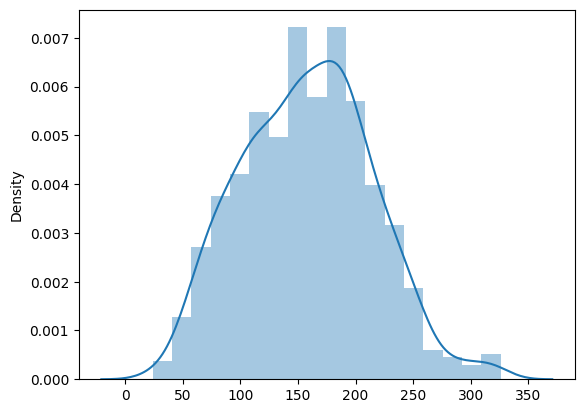

In [91]:
sns.distplot(guest_arrival_series.values )

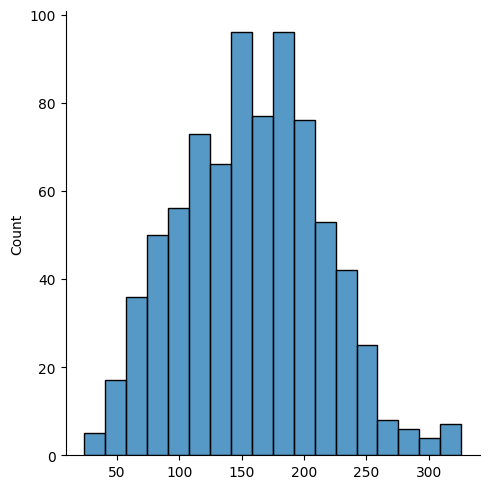

In [92]:
sns.displot(guest_arrival_series.values )

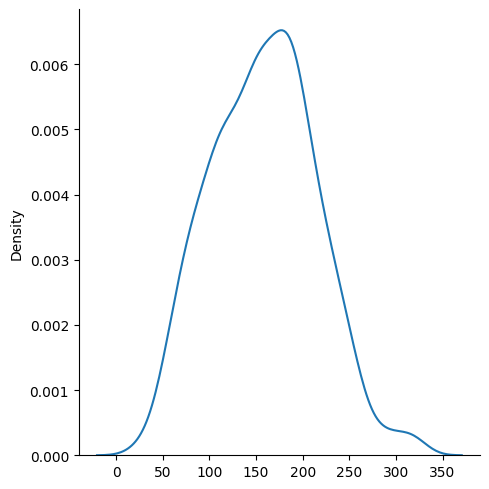

In [93]:
sns.displot(guest_arrival_series.values , kind='kde' )

In [ ]:
'''


we can achieve distribution plot by smoothening our histogram using KDE  ie PDF is a smoothen form of your histogram !
ie histogram -->> apply KDE -->> we will get distribution plot 



This is called density plot bcz here height representshow many pts exists at each of these intervals 
or how dense each of the region is !



density(distribution) plot : at a point , what is a density of a data pt. ?
                or
how many percentage of data pts available at some particular pt .. ?
                or 
What is the % of data points that I will encounter at any point ? 
                or
what is the probability of certain data pt in whole data ?
                or 
prob that my data has value has some specific value 



Note : Above distribution is close to Gaussian/normal distribution , 


'''

In [95]:
np.mean(guest_arrival_series.values)

np.float64(157.92559899117276)

In [96]:
np.median(guest_arrival_series.values)

## mean & median are approx equals , 
## it means distribution is a symmetrical & bell-shaped 

np.float64(158.0)

In [97]:
np.std(guest_arrival_series.values)

np.float64(56.48263702610786)

In [ ]:
'''

between 1 std dev ie between u-sigma to u+sigma ie between 100 to 213 , 
we have approx 68% of data pts 
ie , approx 68% of total guests arrival values lies between interval of 100 to 213


between 2 std dev ie between u-2sigma to u+2sigma ie between 46 to 269 , 
we have approx 95% of data pts 
ie , approx 95% of total guests arrival values lies between interval of 46 to 269


between 3 std dev ie between u-3sigma to u+3sigma ie between 0 to 320 , 
we have approx 99.4% of data pts 
ie , approx 99.7% of total guests arrival values lies between interval of 0 to 320


'''